<a href="https://colab.research.google.com/github/KhoaKD59/ExerciseAI-AI-FuzzyLogic/blob/main/C%E1%BA%A3m_bi%E1%BA%BFn_%C4%91o_nhi%E1%BB%87t_%C4%91%E1%BB%99_v%C3%A0_%C4%91%E1%BB%99_%E1%BA%A9m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Antecedent: temperature Antecedent: humidity Consequent: command
Enter temperature39
Enter humidity40
Command is defined between 15 y 25
17.475438596491227
Cool Up


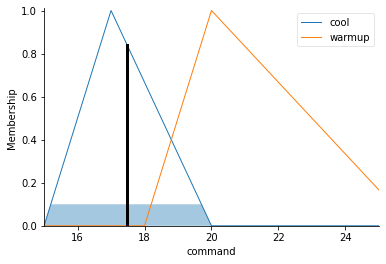

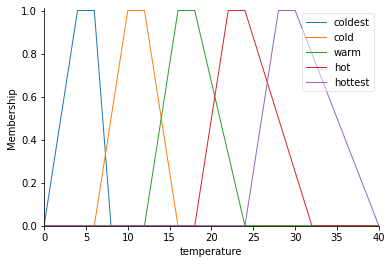

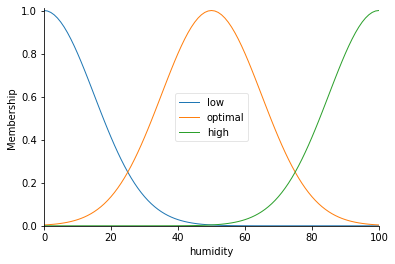

In [6]:
!pip install scikit-learn
!pip install -U scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

%matplotlib inline
# Antecedents
temp= ctrl.Antecedent(np.arange(0, 41), 'temperature')
hum = ctrl.Antecedent(np.arange(0, 101), 'humidity')

# Consequents
cmd = ctrl.Consequent(np.arange(15, 26), 'command')
print(temp,hum,cmd)

# Temperature memberships (Nhiệt độ)
temp['coldest'] = fuzz.trapmf(temp.universe, [0, 4, 6, 8])
temp['cold'] = fuzz.trapmf(temp.universe, [6, 10, 12, 16])
temp['warm'] = fuzz.trapmf(temp.universe, [12, 16, 18, 24])
temp['hot'] = fuzz.trapmf(temp.universe, [18, 22, 24, 32])
temp['hottest'] = fuzz.trapmf(temp.universe, [24, 28, 30, 40])


# Humidity memberships (Dộ ẩm)
hum['low'] = fuzz.gaussmf(hum.universe, 0, 15)
hum['optimal'] = fuzz.gaussmf(hum.universe, 50, 15)
hum['high'] = fuzz.gaussmf(hum.universe, 100, 15)

# Command memberships (lệnh)
cmd['cool'] = fuzz.trimf(cmd.universe, [15, 17, 20])
cmd['warmup'] = fuzz.trimf(cmd.universe, [18, 20, 26])
     

# Rule system (Xây dựng luật khi trời lạnh)
# Rules for warming up
rule1 = ctrl.Rule(
    (temp['coldest'] & hum['low']) |
    (temp['coldest'] & hum['optimal']) |
    (temp['coldest'] & hum['high']) |
    (temp['cold'] & hum['low']) |
    (temp['cold'] & hum['optimal']) |
    (temp['warm'] & hum['low']), cmd['warmup'])
     

# Rules for cooling up (Xây dựng luật khi trời nóng)
rule2 = ctrl.Rule(
    (temp['warm'] & hum['optimal']) |
    (temp['warm'] & hum['high']) |
    (temp['hot'] & hum['optimal']) |
    (temp['hot'] & hum['high']) |
    (temp['hottest'] & hum['low']) |
    (temp['hottest'] & hum['optimal']) |
    (temp['hottest'] & hum['high']), cmd['cool'])
     

# Control System Creation and Simulation
cmd_ctrl = ctrl.ControlSystem([rule1, rule2])
cmd_output = ctrl.ControlSystemSimulation(cmd_ctrl)
     

# Enter values to test

temperature_value = float(input("Enter temperature"))

while temperature_value < 0 or temperature_value > 40:
    try:
        temperature_value = float(input("Please choose a number between 0 and 40 "))
    except ValueError:
        print('We expect you to enter a valid integer')

humidity_value = float(input("Enter humidity"))

while humidity_value < 0 or humidity_value > 100:
    try:
        humidity_value = float(input("Please choose a number between 0 and 100 "))
    except ValueError:
        print('We expect you to enter a valid integer')

cmd_output.input['temperature'] = temperature_value
cmd_output.input['humidity'] = humidity_value

cmd_output.compute()
     
#Enter temperature39
#Enter humidity90

# Print output command and plots
print("Command is defined between 15 y 25")
print(cmd_output.output['command'])
if (cmd_output.output['command'] > 20):
    print('Warm Up')
elif (cmd_output.output['command'] < 20 and cmd_output.output['command'] > 18):
    print('No change')
else:
    print('Cool Up')

cmd.view(sim=cmd_output)
temp.view()
hum.view()